**1.1: Load the Data**

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())




Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

**1.2: Perform EDA**


In [6]:
# Check for missing values
print("\nMissing Values in Customers Data:")
print(customers.isnull().sum())
print("\nMissing Values in Products Data:")
print(products.isnull().sum())
print("\nMissing Values in Transactions Data:")
print(transactions.isnull().sum())

# Basic statistics for Transactions
print("\nBasic Statistics for Transactions:")
print(transactions['TotalValue'].describe())

# Distribution of customers by region
print("\nDistribution of Customers by Region:")
print(customers['Region'].value_counts())

# Top 10 products by sales
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Sales:")
print(top_products)



Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Basic Statistics for Transactions:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

Distribution of Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Top 10 Products by Sales:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019  

**1.3: Visualizations**

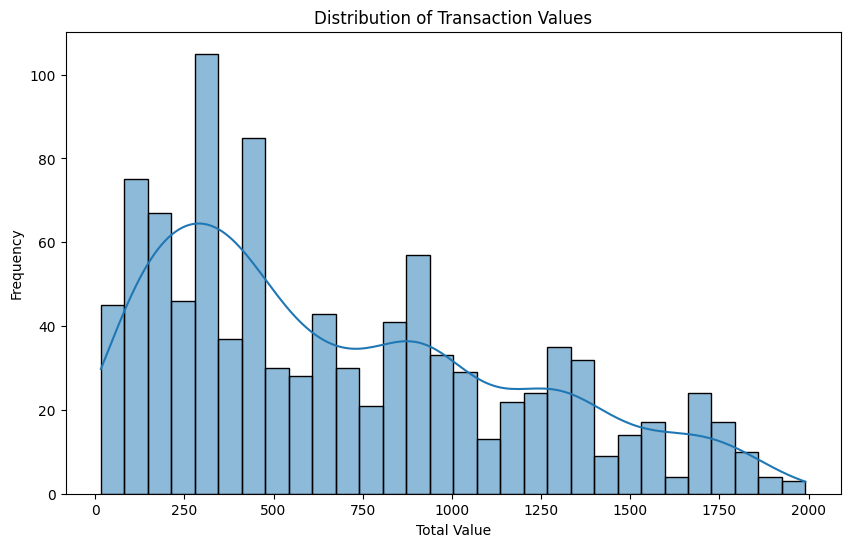

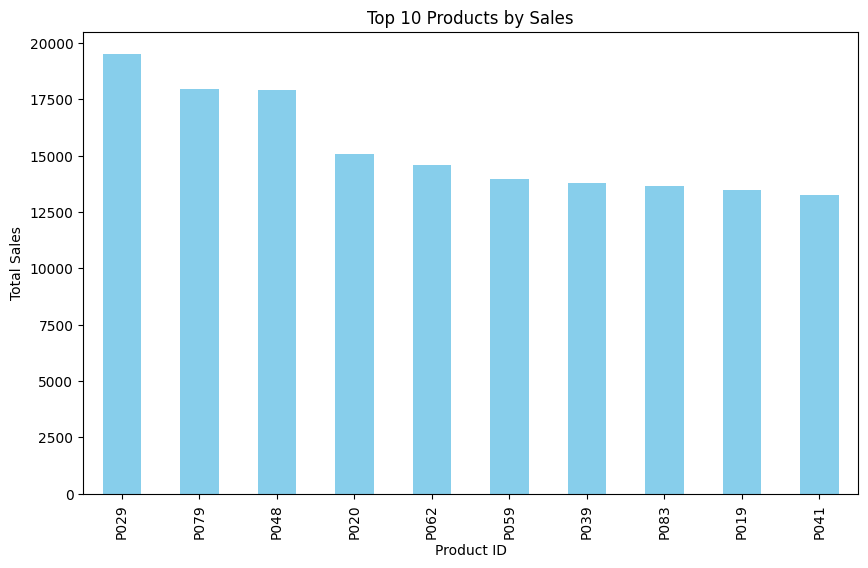

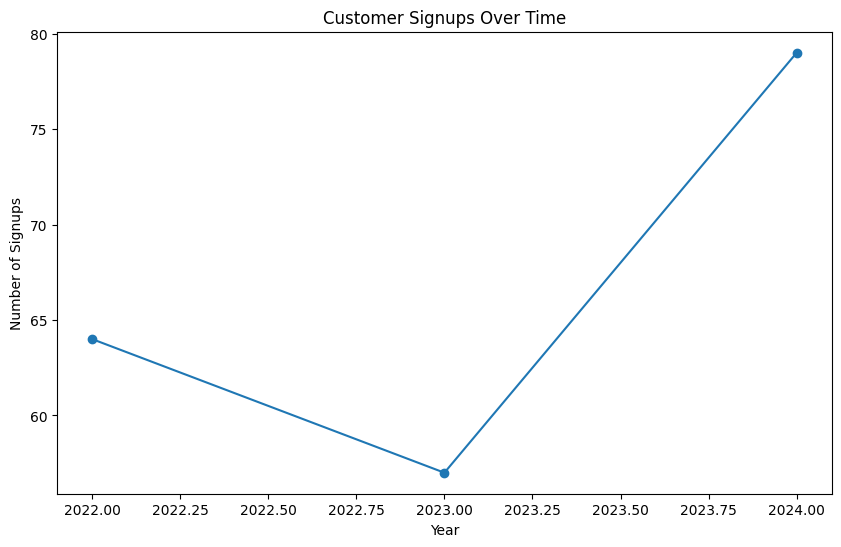

In [7]:
# Visualizations
# Distribution of TotalValue
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

# Top 10 products by sales
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

# Customer signups over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trend = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o')
plt.title('Customer Signups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()